# IMPORTS AND SETUP

In [1]:
%matplotlib inline
import pandas as pd
import tkinter as tk
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from enum import Enum
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
unclean_detailed_info = pd.read_csv('Resources\BoardGames\games_detailed_info.csv')

In [3]:
clean_detailed_info = unclean_detailed_info.drop(['Unnamed: 0', 'type', 'id', 'thumbnail', 'image', 'primary',
       'alternate', 'description', 'yearpublished', 'boardgameexpansion', 'boardgameimplementation',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher', 'boardgameintegration', 'boardgamecompilation', 'boardgamecategory',
       'boardgamemechanic', 'boardgamefamily', 'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank'], axis=1)

# FUNCTIONS

In [149]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [4]:
language_value = {
    'NO' : 1,
    'SOME' : 2,
    'MODERATE' : 3,
    'EXTENSIVE' : 4,
    'UNPLAYABLE' : 5
}

def normalize_language_dependence(game):
    sum_of_weighted_language = 0
    total_num_votes = 0
    for level in game:
        print(level)
        value_key = level['@value'].split(' ')[0].upper()
        language_multiplier = language_value[value_key]
        votes = int(level['@numvotes'])
        total_num_votes += votes
        sum_of_weighted_language += language_multiplier * votes
    return (sum_of_weighted_language / total_num_votes) if total_num_votes > 0 else 0

In [5]:
def add_brackets_and_eval(string_item):
    string_item = str(string_item)
    if string_item[0] != '[':
        string_item = '[' + str(string_item)
    if string_item[-1] != ']':
        string_item = str(string_item) + ']'
    return eval(string_item)

In [6]:
def is_empty_playercount(game):
    for playercount in game:
        if 'result' in playercount:
            return True
        else: 
            return False

In [7]:
def calculate_age_from_ordered_dict(game):
    weighted_age_sum = 0
    total_votes = 0
    for age in game:
        votes = age['@numvotes']
        if age['@value'].isnumeric():
            age_num = age['@value']
        else:
            age_num = 25
        weighted_age_sum += int(age_num) * int(votes) 
        total_votes += int(votes)
    if total_votes:
        return weighted_age_sum/total_votes
    else:
        return 0

In [8]:
result_value = {
    'BEST' : 3,
    'RECOMMENDED' : 2,
    'NOTRECOMMENDED' : 1   
}

def calculate_players_from_ordered_dict(game):
    playercount_normalized_results = {}
    for playercount in game:
        if not 'result' in playercount:
            return 0
        total_votes = 0
        result_total_result = 0
        result_normalized_result = 0
        for result in playercount['result']:
            current_player_count = result['@value']
            multiplier = result_value[result['@value'].upper().replace(' ', '')]
            total_votes += int(result['@numvotes'])
            result_total_result += int(result['@numvotes']) * multiplier
        if(total_votes):
            result_normalized_result = result_total_result / total_votes
        else:
            result_normalized_result = 0
            result_normalized_result = 0
        playercount_normalized_results[playercount['@numplayers']]=result_normalized_result
    sum_of_weighted_players = 0
    sum_of_keys = 0
    num_of_keys = 0
    for key in playercount_normalized_results.keys():
        if not key.isnumeric():
            num = int(key[:-1]) + 1
        else:
            num = int(key)
        sum_of_weighted_players += num * (playercount_normalized_results[key]/3)
        sum_of_keys += num
        num_of_keys += 1
    return (sum_of_weighted_players)/(sum_of_keys/num_of_keys)


# DATA CLEANING

In [9]:
clean_detailed_info = clean_detailed_info.fillna(0)

In [10]:
clean_detailed_info['suggested_num_players'] = clean_detailed_info['suggested_num_players'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_num_players'] = clean_detailed_info['suggested_num_players'].apply(calculate_players_from_ordered_dict)

In [11]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_playerage'] != 0]
clean_detailed_info['suggested_playerage'] = clean_detailed_info['suggested_playerage'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_playerage'] = clean_detailed_info['suggested_playerage'].apply(calculate_age_from_ordered_dict)

In [12]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_language_dependence'] != 0]
clean_detailed_info['suggested_language_dependence'] = clean_detailed_info['suggested_language_dependence'].apply(add_brackets_and_eval)
clean_detailed_info['suggested_language_dependence'] = clean_detailed_info['suggested_language_dependence'].apply(normalize_language_dependence)

OrderedDict([('@level', '16'), ('@value', 'No necessary in-game text'), ('@numvotes', '10')])
OrderedDict([('@level', '17'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '258')])
OrderedDict([('@level', '18'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '42')])
OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '3')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '1')])
OrderedDict([('@level', '41'), ('@value', 'No necessary in-game text'), ('@numvotes', '444')])
OrderedDict([('@level', '42'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '7')])
OrderedDict([('@level', '43'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '44'), ('@value', 'Extensive use of text - massive conversio

OrderedDict([('@level', '45'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '16'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '17'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '18'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '19')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '2')])
OrderedDict([('@level', '721'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '722'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '723'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvot

OrderedDict([('@level', '4'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '5'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '696'), ('@value', 'No necessary in-game text'), ('@numvotes', '20')])
OrderedDict([('@level', '697'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '698'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '699'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '700'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '16'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '17'), ('@value', 'Some necessary text - easily memorized or small crib sheet')

OrderedDict([('@level', '2'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '3'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '4'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '5'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '191'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '192'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '9')])
OrderedDict([('@level', '193'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '3')])
OrderedDict([('@level', '194'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '195'), ('@value', 'Unplaya

OrderedDict([('@level', '78'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '79'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '80'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '641'), ('@value', 'No necessary in-game text'), ('@numvotes', '7')])
OrderedDict([('@level', '642'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '1')])
OrderedDict([('@level', '643'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '644'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '645'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '376'), ('@value', 'No necessary in-game text'), (

OrderedDict([('@level', '8'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '9'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '2')])
OrderedDict([('@level', '10'), ('@value', 'Unplayable in another language'), ('@numvotes', '6')])
OrderedDict([('@level', '1'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '2'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '5')])
OrderedDict([('@level', '3'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '1')])
OrderedDict([('@level', '4'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '5'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '31'), ('@value', 'No necessary in-game text'), ('@numvotes', 

OrderedDict([('@level', '162'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '163'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '164'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '165'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '6'), ('@value', 'No necessary in-game text'), ('@numvotes', '2')])
OrderedDict([('@level', '7'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '8'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '9'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '10'), ('@value', 'Unplayab

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




OrderedDict([('@level', '89'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '90'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '31'), ('@value', 'No necessary in-game text'), ('@numvotes', '2')])
OrderedDict([('@level', '32'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '33'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '34'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '35'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '26'), ('@value', 'No necessary in-game text'), ('@numvotes', '3')])
OrderedDict([('@level', '27'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), (

OrderedDict([('@level', '16'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '17'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '18'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '19'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '20'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '51'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '52'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '53'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '54'), ('@value', 'Extensive use of text - massive conversion need

OrderedDict([('@level', '85'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '61'), ('@value', 'No necessary in-game text'), ('@numvotes', '1')])
OrderedDict([('@level', '62'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '63'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '0')])
OrderedDict([('@level', '64'), ('@value', 'Extensive use of text - massive conversion needed to be playable'), ('@numvotes', '0')])
OrderedDict([('@level', '65'), ('@value', 'Unplayable in another language'), ('@numvotes', '0')])
OrderedDict([('@level', '1'), ('@value', 'No necessary in-game text'), ('@numvotes', '0')])
OrderedDict([('@level', '2'), ('@value', 'Some necessary text - easily memorized or small crib sheet'), ('@numvotes', '0')])
OrderedDict([('@level', '3'), ('@value', 'Moderate in-game text - needs crib sheet or paste ups'), ('@numvotes', '2

In [13]:
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_num_players'] > 0]
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_playerage'] > 0]
clean_detailed_info = clean_detailed_info[clean_detailed_info['suggested_language_dependence'] > 0]

# PRINTOUTS

In [14]:
print(unclean_detailed_info.columns)
print(unclean_detailed_info)

Index(['Unnamed: 0', 'type', 'id', 'thumbnail', 'image', 'primary',
       'alternate', 'description', 'yearpublished', 'minplayers', 'maxplayers',
       'suggested_num_players', 'suggested_playerage',
       'suggested_language_dependence', 'playingtime', 'minplaytime',
       'maxplaytime', 'minage', 'boardgamecategory', 'boardgamemechanic',
       'boardgamefamily', 'boardgameexpansion', 'boardgameimplementation',
       'boardgamedesigner', 'boardgameartist', 'boardgamepublisher',
       'usersrated', 'average', 'bayesaverage', 'Board Game Rank',
       'Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'owned',
       'trading', 'wanting', 'wishing', 'numcomments', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', 'Children's Game Rank',
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commod

In [15]:
print(clean_detailed_info.columns)
print(clean_detailed_info)

Index(['minplayers', 'maxplayers', 'suggested_num_players',
       'suggested_playerage', 'suggested_language_dependence', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'usersrated', 'average',
       'bayesaverage', 'Board Game Rank', 'Strategy Game Rank',
       'Family Game Rank', 'stddev', 'median', 'owned', 'trading', 'wanting',
       'wishing', 'numcomments', 'numweights', 'averageweight',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', 'Children's Game Rank'],
      dtype='object')
       minplayers  maxplayers  suggested_num_players  suggested_playerage  \
0               2           4               3.294766             9.734205   
1               2           5               3.650544             7.615527   
2               3           4               3.075150             8.862408   
3               2           7               5.159062            10.004464   
4               2           4             

In [16]:
clean_detailed_info.shape[0]

12091

In [17]:
clean_detailed_info

minplayers  maxplayers  suggested_num_players  suggested_playerage  \
0               2           4               3.294766             9.734205   
1               2           5               3.650544             7.615527   
2               3           4               3.075150             8.862408   
3               2           7               5.159062            10.004464   
4               2           4               3.181440             9.691038   
...           ...         ...                    ...                  ...   
19222           2           2               2.333333            16.000000   
19225           2           4               3.000000             8.000000   
19226           2           5               3.809524             8.000000   
19227           3           8               3.133333             6.000000   
19229           2           4               3.859259            14.400000   

       suggested_language_dependence  playingtime  minplaytime  maxplaytime  \
0                           2.130573           45           45           45   
1                           1.028698           45           30           45   
2                           2.034268          120           60          120   
3                           1.251295           30           30           30   
4                           3.145585           30           30           30   
...                              ...          ...          ...          ...   
19222                       3.500000            0            0            0   
19225                       1.000000            0            0            0   
19226                       2.000000           30           15           30   
19227                       1.000000           20           20           20   
19229                       2.000000           90           60           90   

       minage  usersrated  ...  wishing  numcomments  numweights  \
0           8       96241  ...     8571        15778        5232   
1           7       96228  ...     6286        17720        7304   
2          10       96213  ...     5310        17859        7187   
3          10       79873  ...    10875        13304        4423   
4          13       74959  ...     7607        13008        4850   
...       ...         ...  ...      ...          ...         ...   
19222      12          30  ...       30           19           9   
19225       7          30  ...        4            4           1   
19226      10          30  ...        1           13           2   
19227       8          30  ...        6           10           1   
19229      12          30  ...      135           46           7   

       averageweight  Party Game Rank  Abstract Game Rank  Thematic Rank  \
0             2.4148              0.0                 0.0            0.0   
1             1.9158              0.0                 0.0            0.0   
2             2.3264              0.0                 0.0            0.0   
3             2.3321              0.0                 0.0            0.0   
4             2.3586              0.0                 0.0            0.0   
...              ...              ...                 ...            ...   
19222         2.4444              0.0                 0.0            0.0   
19225         1.0000              0.0                 0.0            0.0   
19226         2.0000              0.0                 0.0            0.0   
19227         1.0000              0.0                 0.0            0.0   
19229         3.2857              0.0                 0.0            0.0   

       War Game Rank  Customizable Rank  Children's Game Rank  
0                0.0                0.0                   0.0  
1                0.0                0.0                   0.0  
2                0.0                0.0                   0.0  
3                0.0                0.0                   0.0  
4                0.0                0.0                   0.0  
...              ..

# APPLICATION

# TESTING

In [18]:
print(clean_detailed_info.columns)
clean_detailed_info[clean_detailed_info['Customizable Rank'] > 0]

Index(['minplayers', 'maxplayers', 'suggested_num_players',
       'suggested_playerage', 'suggested_language_dependence', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'usersrated', 'average',
       'bayesaverage', 'Board Game Rank', 'Strategy Game Rank',
       'Family Game Rank', 'stddev', 'median', 'owned', 'trading', 'wanting',
       'wishing', 'numcomments', 'numweights', 'averageweight',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', 'Children's Game Rank'],
      dtype='object')


minplayers  maxplayers  suggested_num_players  suggested_playerage  \
48              2           2               2.129190            11.370787   
68              2           2               1.670870            12.589286   
76              1           2               2.250199            13.239316   
94              2           2               2.102763             9.945205   
112             1           2               2.255503            11.914634   
...           ...         ...                    ...                  ...   
17713           2           8               4.000000            10.000000   
18238           2           6               3.583333            10.000000   
18659           2           2               2.166667             8.000000   
18879           2           9               4.333333             9.333333   
18932           2           4               2.888889            10.000000   

       suggested_language_dependence  playingtime  minplaytime  maxplaytime  \
48                          4.414634           20           20           20   
68                          4.042328           45           45           45   
76                          4.181818          120           60          120   
94                          2.882979           45           30           45   
112                         4.067797           60           30           60   
...                              ...          ...          ...          ...   
17713                       4.000000           30           30           30   
18238                       4.000000           60           60           60   
18659                       3.000000           30           30           30   
18879                       4.000000            0            0            0   
18932                       4.000000           60           60           60   

       minage  usersrated  ...  wishing  numcomments  numweights  \
48         13       31092  ...      592         6773        1994   
68         14       26004  ...     4410         5376        1539   
76         14       25078  ...     6860         4005         789   
94         14       22463  ...     2172         3758        1103   
112        13       20012  ...     3159         4154        1292   
...       ...         ...  ...      ...          ...         ...   
17713      10          35  ...        8           23           4   
18238      12          33  ...       39           27           6   
18659       8          32  ...       12           18           6   
18879       8          31  ...        1           14           3   
18932      10          31  ...        4           19           3   

       averageweight  Party Game Rank  Abstract Game Rank  Thematic Rank  \
48            3.2036              0.0                 0.0            0.0   
68            3.3834              0.0                 0.0            0.0   
76            3.4018              0.0                 0.0            7.0   
94            2.4823              0.0                 0.0            0.0   
112           3.1687              0.0                 0.0            0.0   
...              ...              ...                 ...            ...   
17713         1.7500              0.0                 0.0            0.0   
18238         4.0000              0.0                 0.0            0.0   
18659         1.5000              0.0                 0.0            0.0   
18879         3.6667              0.0                 0.0            0.0   
18932         2.6667              0.0                 0.0            0.0   

       War Game Rank  Customizable Rank  Children's Game Rank  
48               0.0               22.0                   0.0  
68               0.0                3.0                   0.0  
76               0.0                1.0                   0.0  
94              47.0                8.0                   0.0  
112              0.0                5.0                   0.0  
...              ..

In [180]:
train_set, test_set = train_test_split(clean_detailed_info, test_size=0.2, random_state=86, shuffle=True)
scaler = StandardScaler().fit(train_set)
scaler

StandardScaler()

In [165]:
scaler.mean_, scaler.scale_, scaler.transform(train_set)

(array([2.00703060e+00, 5.30386683e+00, 3.36975697e+00, 1.00198908e+01,
        2.16179873e+00, 1.09558830e+02, 7.13421216e+01, 1.09558830e+02,
        9.68672457e+00, 1.23972405e+03, 6.51421433e+00, 5.77754396e+00,
        8.00435339e+03, 1.63220223e+02, 1.58846981e+02, 1.48215921e+00,
        0.00000000e+00, 1.99989992e+03, 6.20351530e+01, 6.15573821e+01,
        3.09354322e+02, 3.07794975e+02, 7.71729735e+01, 2.09730827e+00,
        1.29871795e+01, 2.78403639e+01, 4.61418528e+01, 2.41181865e+02,
        2.23924731e+00, 1.84802523e+01]),
 array([6.60813995e-01, 8.24875567e+00, 1.73971417e+00, 3.14821296e+00,
        1.18253118e+00, 1.39950832e+03, 6.26665107e+02, 1.39950832e+03,
        3.60478807e+00, 4.24945617e+03, 8.68304784e-01, 4.37876045e-01,
        5.63970709e+03, 4.39953258e+02, 4.28953023e+02, 2.61959655e-01,
        1.00000000e+00, 6.00709278e+03, 1.20578751e+02, 1.45477548e+02,
        8.66806566e+02, 8.03335084e+02, 2.63907763e+02, 8.07404640e-01,
        7.03878805e+01

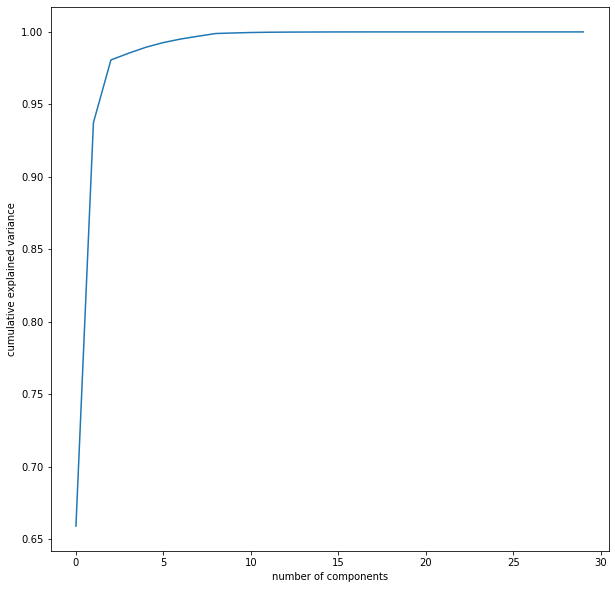

In [181]:
pca = PCA().fit(train_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [173]:
pca = PCA(n_components = 5)
pca.fit(train_set)

PCA(n_components=5)

In [174]:
X = pca.transform(train_set)
Y = pca.transform(test_set)

In [135]:
plt.rcParams["figure.figsize"] = (10,10)

In [177]:
pca = PCA(n_components=3)
pca.fit(train_set)
X_pca = pca.transform(train_set)
print("original shape:   ", train_set.shape)
print("transformed shape:", X_pca.shape)

original shape:    (9672, 30)
transformed shape: (9672, 3)


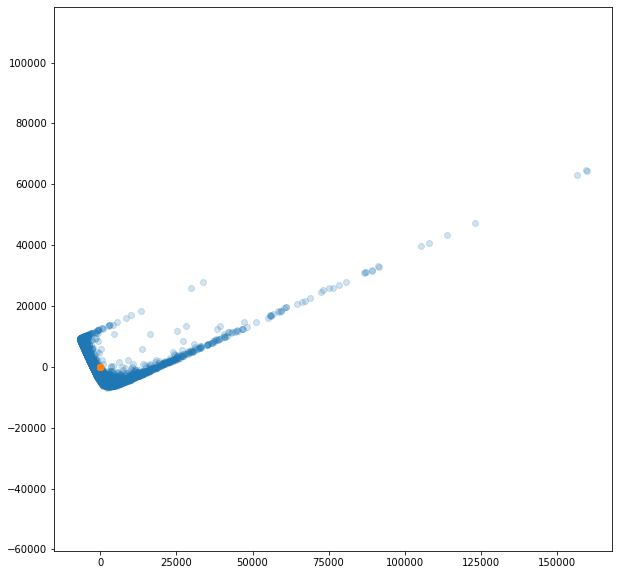

In [179]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [157]:
print(pca.components_)
print(pca.explained_variance_)

[[-3.65019868e-06 -1.08279624e-05  8.87610232e-06  2.23409264e-05
   3.24812497e-06 -2.92702014e-04 -4.16236302e-04 -2.92702014e-04
   6.78790711e-05  5.16790662e-01  4.36463859e-05  4.22426754e-05
  -4.14286996e-01  2.94062556e-03 -5.55440502e-04 -7.32633162e-06
  -0.00000000e+00  7.36526050e-01  1.26436008e-02  1.33978949e-02
   9.02990475e-02  9.66508026e-02  2.90215150e-02  1.83704475e-05
  -6.23668951e-05 -1.46301118e-03  4.83037526e-05 -1.15148680e-02
  -6.68699663e-05 -1.45358323e-03]
 [ 1.01578103e-05  7.39155429e-05  1.07347403e-05 -1.06348529e-04
  -1.70243640e-06 -4.70338400e-03 -1.02448459e-03 -4.70338400e-03
  -1.32307128e-04  2.45465152e-01 -1.06838151e-04 -3.03161957e-05
   9.09284552e-01 -1.86097687e-02  1.76268704e-04  1.81376833e-05
   0.00000000e+00  3.32506378e-01  2.63474852e-03 -1.54301707e-03
   1.42398353e-02  3.62485969e-02  1.35557088e-02 -5.03150349e-05
   1.04969714e-03  3.39260164e-03 -1.76731333e-03  1.56381610e-02
   9.41022480e-05  5.11509291e-03]]
[6104

ValueError: too many values to unpack (expected 2)

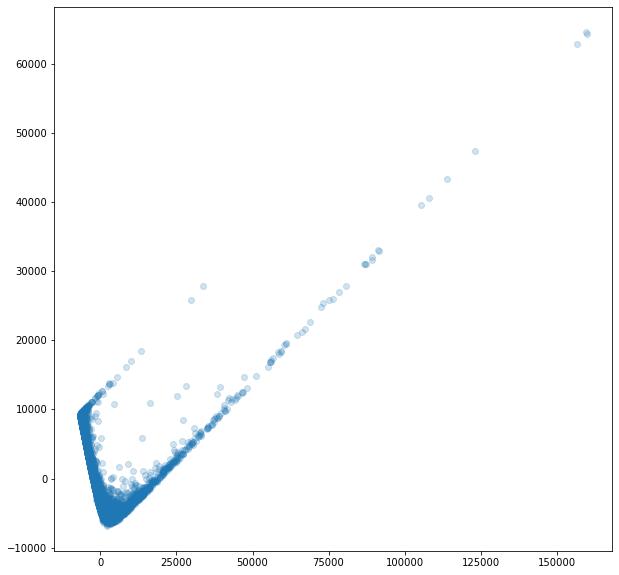

In [154]:
# plt.scatter(X[:,0], X[:, 1], c='r', s=1, marker='o', linewidths=.1)


plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.show()

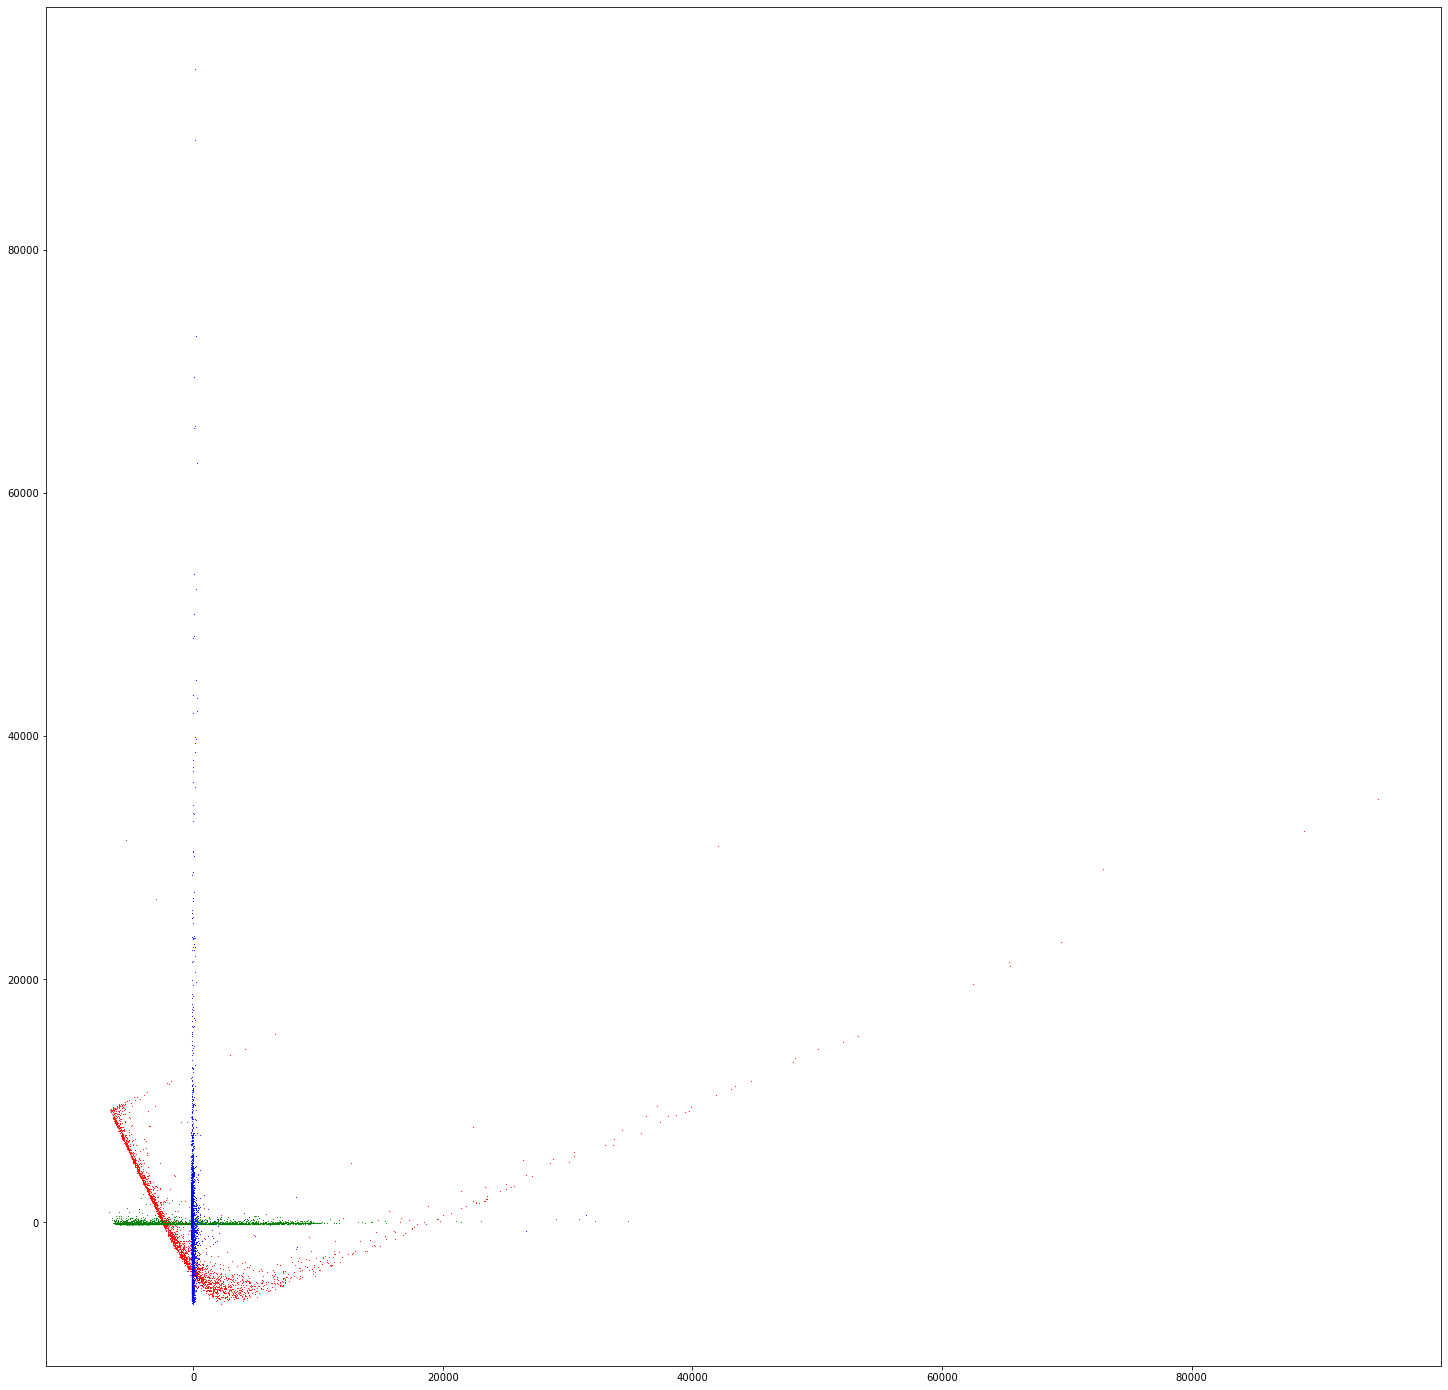

In [107]:
plt.scatter(Y[:,0], clean_detailed_info['average'], c='r', s=1, marker='o', linewidths=.1)
plt.scatter(Y[:,1], clean_detailed_info['average'], c='g', s=1, marker='o', linewidths=.1)
plt.scatter(Y[:,2], clean_detailed_info['average'], c='b', s=1, marker='o', linewidths=.1)
plt.show()